Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл: 

* LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6:  задолженность,  BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь 
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре 
* default - индикатор невозврата денежных средств

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import *

In [2]:
df = pd.read_csv('credit_card_default_analysis.csv')

In [3]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,0,0,0,0,...,0,13007,13912,0,0,0,13007,1122,0,0


Разделение данных на данные о вернувших кредит df_default_0 и тех, кто не вернул df_default_1

In [4]:
df_default_0 = df[df['default'] == 0]
df_default_1 = df[df['default'] == 1]

In [5]:
df_default_0.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,0,0,0,0,...,0,13007,13912,0,0,0,13007,1122,0,0
10,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
11,12,260000,2,1,2,51,0,0,0,0,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0


In [6]:
df_default_1.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,0,0,0,0,...,0,632,316,316,316,0,632,316,0,1
22,23,70000,2,2,2,26,2,0,0,2,...,44006,46905,46012,2007,3582,0,3601,0,1820,1
23,24,450000,2,1,1,40,0,0,0,0,...,560,0,0,19428,1473,560,0,0,1128,1
26,27,60000,1,1,2,27,1,0,0,0,...,-57,127,-189,0,1000,0,500,0,1000,1
31,32,50000,1,2,2,33,2,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,1
38,39,50000,1,1,2,25,1,0,0,0,...,0,0,0,780,0,0,0,0,0,1


# Задание 1
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:

a)  о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки;

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Значимы ли полученные результаты с практической точки зрения?

Построим гистограммы кредитного лимита (LIMIT_BAL) для клиентов, вернувших кредит (default = 0) и клиентов, не вернувших кредит (default = 1). По гистограмам уже можно предположить, что кредитный лимит в среднем меньше у клиентов, не вернувших кредит.

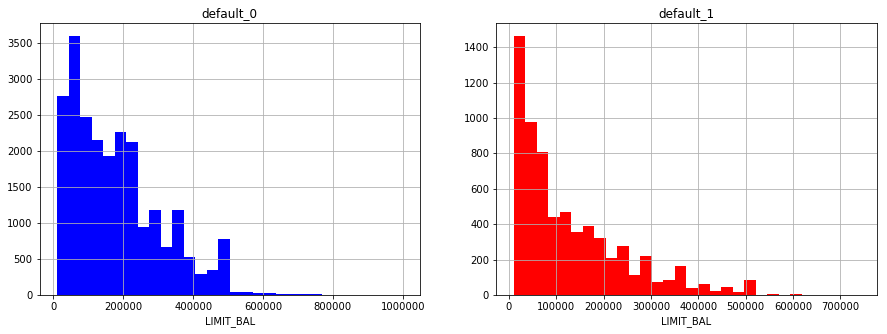

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.hist(df_default_0['LIMIT_BAL'], bins=30, color = 'b')
plt.xlabel('LIMIT_BAL')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.hist(df_default_1['LIMIT_BAL'], bins=30, color = 'r')
plt.xlabel('LIMIT_BAL')

plt.show()

a) Проверим гипотезу о равенстве медианных значений кредитного лимита в обеих группах с помощью интервальной оценки.

То есть проверяется нулевая гипотеза $H_{0}:$ медианные значения кредитного лимита (LIMIT_BAL) в группе клиентов, вернувших кредит, (default_0) и в группе клиентов, не вернувших кредит (default_1) равны, против двухсторонней альтернативы $H_{1}$: медианные значения кредитного лимита (LIMIT_BAL) в этих группах не равны.

Так как распределения кредитного лимита в обоих группах неизвестно, то для пострения доверительных интервалов можно воспользоваться методом bootstrap.

Вычислим доверительные интервалы для медиан кредитного лимита обеих выборок. Для этого реализуем функции get_bootstrap_samples и stat_intervals.

In [8]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [9]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
default_0_median_scores = map(np.median, get_bootstrap_samples(df_default_0['LIMIT_BAL'].values, 1000))
print '95%% доверительный интервал для медианы кредитного лимита выборки клиентов, отдавших кредит:',  stat_intervals(default_0_median_scores, 0.05)

95%% доверительный интервал для медианы кредитного лимита выборки клиентов, отдавших кредит: [150000. 150000.]


In [11]:
default_1_median_scores = map(np.median, get_bootstrap_samples(df_default_1['LIMIT_BAL'].values, 1000))
print '95%% доверительный интервал для медианы кредитного лимита выборки клиентов, не отдавших кредит:',  stat_intervals(default_1_median_scores, 0.05)

95%% доверительный интервал для медианы кредитного лимита выборки клиентов, не отдавших кредит: [80000. 90000.]


Как видно, доверительные интервалы не пересекаются, поэтому можно сделать вывод, о том, что нулевая гипотеза $H_{0}$ отвергается в пользу двухсторонней альтернативы. Более того, по полученным интервалам видно, что кредитный лемит в среднем меньше у клиентов, невернувших кредит.

b) Далее проверяется гипотеза о равенстве распределений. Нулевую гипотезу $H_{0}$ и двухстороннюю альтернативу $H_{0}$ можно записать следующим образом:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$ (распределения одинаковы)

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$ (распределения неодинаковы, отличаются на сдвиг),

где $F_{X_1}(x)$ - распределение кредитного лимита (LIMIT_BAL) в группе клиентов, вернувших кредит, (default_0), $F_{X_2}(x)$ - распределение кредитного лимита (LIMIT_BAL) в группе клиентов, вернувших кредит, (default_1) 

Так как выборки независимые, то будем проверять гипотезу критерием Манна-Уитни.

In [12]:
print 'p-value: ', stats.mannwhitneyu(df_default_0['LIMIT_BAL'], df_default_1['LIMIT_BAL'])[1]

p-value:  6.127742909111652e-190


Так как критерий значимости во много раз меньше 0.05, то нулевую гипотезу $H_{0}$ можно с уверенностью отвергнуть на уровне значимости 0.05, и средние кредитные лимиты в двух не равны, следовательно, распределения - не равны.

Для проверки практической значимости проведем точечную оценку разности медиан данных выборок.

In [13]:
print '95%% доверительный интервал для медианы разницы кредитных лимитов выборок клиентов, отдавших и не отдавших кредит:',  abs(df_default_0['LIMIT_BAL'].median() - df_default_1['LIMIT_BAL'].median())

95%% доверительный интервал для медианы разницы кредитных лимитов выборок клиентов, отдавших и не отдавших кредит: 60000.0


Похоже, что это статистически значимый результат.

# Задание 2
Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается.  Хорошо, если вы предоставите несколько различных решений  этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

Переделаем выборки полов клиентов, отдавших и не отдавших кредиты. В новых выборках 0 - муж., 1 - жен.

In [14]:
default_0_sex = df_default_0['SEX'].values - 1
default_1_sex = df_default_1['SEX'].values - 1

Построим гистограммы гендерного состава клиентов, вернувших кредит (default = 0) и клиентов, невернувших кредит (default = 1). По гистограмам можно предположить, что в группе людей, не вернувших кредит, доля женщин больше, чем в группе людей, вернувших кредит.

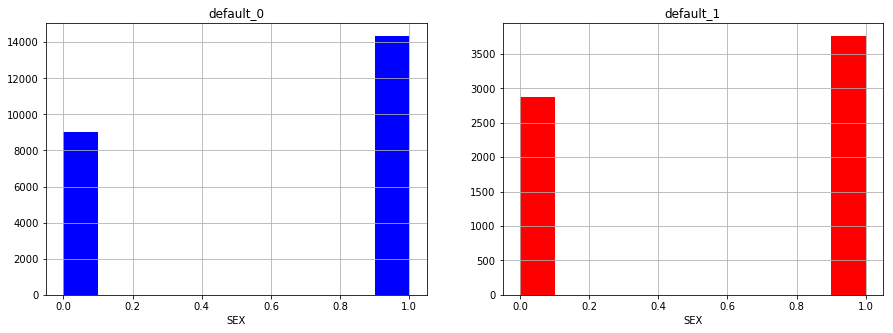

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.hist(default_0_sex, color = 'b')
plt.xlabel('SEX')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.hist(default_1_sex, color = 'r')
plt.xlabel('SEX')

plt.show()

Вычислим доли женщин в обоих выборках.

In [16]:
print 'Доля женщин в выборке клиентов, отдавших кредит:',  float(default_0_sex.sum()) / len(default_0_sex)
print 'Доля женщин в выборке клиентов, не отдавших кредит:',  float(default_1_sex.sum()) / len(default_1_sex)

Доля женщин в выборке клиентов, отдавших кредит: 0.614149974319
Доля женщин в выборке клиентов, не отдавших кредит: 0.567058468957


Проверяется нулевая гипотеза $H_{0}$: гендерный состав в группе людей, вернувших кредит (default_0) и в группе людей, не вернувших кредит (default_1) одинаковый против двухсторонней альтернативы $H_{1}$.

Для проверки этой гипотезы проведем интервальную оценку разности долей для независимых выборок.

In [17]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):
    z = sp.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [18]:
print '95% доверительный интервал для разности долей женщин в данных выборках: ', proportions_diff_confint_ind(default_0_sex, default_1_sex)

95% доверительный интервал для разности долей женщин в данных выборках:  (0.03363493274962867, 0.060548077974896725)


Как видно, доверительный интервал не включает в себя 0, следовательно можно с увереностью отвергнуть нулевую гипотезу $H_{0}$ в пользу двухсторонней альтернативы $H_{1}$. Доля женщин в группе клиентов, не отдавших кредит меньше доли женщин в группе отдавших кредит.

Дополнительно проверим нулевую гипотезу о равенстве долей в данных группах против двухсторонней альтернативы с помощью Z-критерия для разности долей в независимых выборках.

In [19]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [20]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sp.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sp.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sp.stats.norm.cdf(z_stat)

In [21]:
print "p-value: ", proportions_diff_z_test(proportions_diff_z_stat_ind(default_0_sex, default_1_sex))

p-value:  4.472866521609831e-12


Достигаемый уровень значимости намного меньше 0.05. Следовательно, можно с уверенностью отвергнуть нулевую гипотезу $H_{0}$.

# Задание 3
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.  Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости?  Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг? наоборт, не отдаст долг?

Уберем из выборок элементы со значениями EDUCATION равными 6, так как это означает, что дынных нет. Значения 0-5 будут иметь такие же значения, что и в данных:
* 0 = доктор;
* 1 = магистр;
* 2 = бакалавр;
* 3 = выпускник школы;
* 4 = начальное образование; 
* 5 = прочее.

In [22]:
default_0_education = df_default_0[df_default_0['EDUCATION'] != 6]
default_0_education = default_0_education['EDUCATION'].values
default_1_education = df_default_1[df_default_1['EDUCATION'] != 6]
default_1_education = default_1_education['EDUCATION'].values

Построим гистограммы образования (EDUCATION) для клиентов, вернувших кредит (default = 0) и клиентов, не вернувших кредит (default = 1).
По ним видно, что в группе без дефолта процент магистров (значение 1) выше, чем процент магистров в группе клиентов с дефолтом.

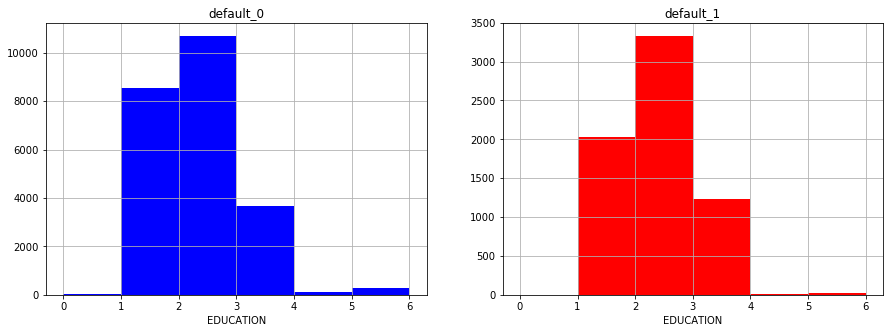

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.hist(default_0_education, color = 'b', bins=[0, 1, 2, 3, 4, 5, 6])
plt.xlabel('EDUCATION')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.hist(default_1_education, color = 'r', bins=[0, 1, 2, 3, 4, 5, 6])
plt.xlabel('EDUCATION')

plt.show()

Проверяется гипотеза о том, что образование не влияет на то, вернет ли человек долг.

То есть проверятся нулевая гипотеза $H_{0}$: образование не влияет на вероятность возврата долга (распределения групп образования (EDUCATION) в группах людей, вернувших долг (default = 0) в группах людей, вернувших долг (default = 1) одинаковы) против альтернативы $H_{1}$: образование влияет на вероятность возврата долга (распределения групп образования (EDUCATION) в группах людей, вернувших долг (default = 0) в группах людей, вернувших долг (default = 1) разлличные)

Составим таблицу сопряженности для данных выборок, в которой значение столбца 0 означает клиентов, выплативших кредит, 1 - клиентов, не выплативших кредит, значения строк 0-5 соответствуют значениям из столбца EDUCATION.

In [24]:
mat_corr = np.zeros((6, 2))
for i in range(6):
    mat_corr[i, 0] = len(default_0_education[default_0_education == i])
    mat_corr[i, 1] = len(default_1_education[default_1_education == i])
corr_table = pd.DataFrame(np.int32(mat_corr))
corr_table

,0,1
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18


Посчитаем ожидаемое количество элементов в каждой ячейке при условии справедливости нулевой гипотезы $H_{0}$ и запишем в массив mat_exp.

In [25]:
mat_exp = np.zeros((6, 2))
n = np.sum(mat_corr)
for i in range(len(mat_exp)):
    for j in range(len(mat_exp[0])):
        mat_exp[i, j] = mat_corr[i, :].sum() * mat_corr[:, j].sum() / n
exp_table = pd.DataFrame(mat_exp)
exp_table

,0,1
0,10.901666,3.098334
1,8242.438312,2342.561688
2,10925.026879,3104.973121
3,3828.820896,1088.179104
4,95.778924,27.221076
5,218.033323,61.966677


Для оценки взаимосвязи между образованием и принадлежностью к группам отдавших и не отдавших кредиты людей вычислим  коэффициент V Крамера по таблице mat_corr. Для его подсчета необходимо вычислить критерий хи-квадрат. Согласно условиям применимости критерия хи-квадрат выборка должна быть длиной не менее 40, а ожидаемое количество элементов корреляционной матрицы было менее 5 не более, чем в 20% ячеек. Длина выборки намного больше 40, а как видно из матрицы mat_exp ожидаемое количество элементов менее 5 только в одной ячейке из 12, то есть в 8% случаев, значит в данном случае критерий хи-квадрат применим.

Вычислим коэффициент V Крамера через критерий хи-квадрат для корреляционной матрицы mat_corr.

In [26]:
def coef_v_kram(matrix):
    n = np.sum(matrix)
    chi_squere = 0
    K1 = matrix.shape[0]
    K2 = matrix.shape[1]
    for i in range(K1):
        for j in range(K2):
            chi_squere += (matrix[i, j] ** 2) / (mat_corr[i, :].sum() * mat_corr[:, j].sum())
    chi_squere -= 1
    chi_squere *= n
    return np.sqrt(chi_squere / (n * np.min(np.array([K1, K2]) - 1)))

In [27]:
print 'Коэффициент V Крамера для связи образования и индикатора дефолта: ', coef_v_kram(mat_corr)

Коэффициент V Крамера для связи образования и индикатора дефолта:  0.07353171496579997


Коэффициент V Крамера отличается от нуля, что свидетельствует о том, что есть взаимосвязь между образованием в группе людей, вернувших кредит и не вернувших. Проверить, что коэффициент V Крамера значимо отличается от нуля и можно отвергнуть нулевую теорию $H_{0}$ возможно с помощью критерия $χ^{2}$.

In [28]:
print 'p-value: ', sp.stats.chi2_contingency(mat_corr)[1]

p-value:  3.835554410888646e-33


p-value значительно меньше 0.05. Это означает, что образование и принадлежность к группе людей, отдавших или неотдавших кредит, зависимы, следовательно, нулевая гипотеза $H_{0}$ отвергается.

Для наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и невернувших кредит составим матрицу сопряженности mat_dif, где значениями ячеек является разность между наблюдаемым и ожидаемым количествами.

In [29]:
mat_dif = mat_corr - mat_exp
dif_table = pd.DataFrame(mat_dif)
dif_table

,0,1
0,3.098334,-3.098334
1,306.561688,-306.561688
2,-225.026879,225.026879
3,-148.820896,148.820896
4,20.221076,-20.221076
5,43.966677,-43.966677


Построим графики разности между ожидаемыми и наблюдаемыми значениями количества человек в обеих группах:  вернувших кредит (default=0) и группе не вернувших кредит (default=1).

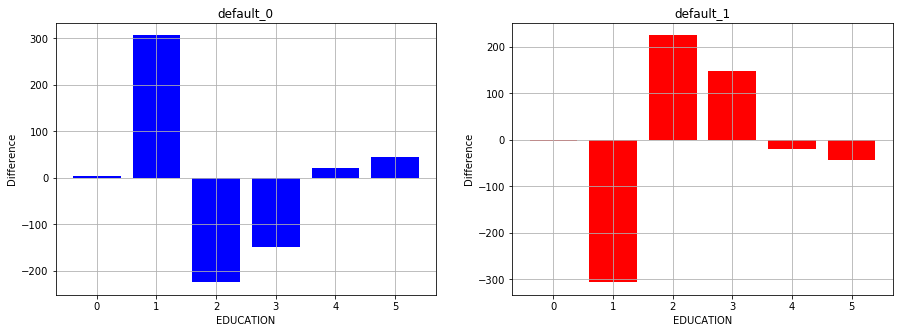

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.bar([0, 1, 2, 3, 4, 5], mat_dif[:, 0], color = 'b')
plt.xlabel('EDUCATION')
plt.ylabel('Difference')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.bar([0, 1, 2, 3, 4, 5], mat_dif[:, 1], color = 'r')
plt.xlabel('EDUCATION')
plt.ylabel('Difference')

plt.show()

Из-за большого разброса количества людей с различным образованием невозможно по графикам определить, люди с каким образованием наиболе или наименее надежны. Поэтому, необходимо привести значения таблицы ячеек mat_diff к одному масштабу. Для этого модифицируем таблицу, разделив значения в каждой строке на общее количество людей с данным образованием. Построим аналогичные графики.

In [31]:
improved_dif_mat = mat_dif
for i in range(len(mat_dif)):
    improved_dif_mat[i] /= np.sum(mat_corr[i])
dif_mat_table = pd.DataFrame(improved_dif_mat)
dif_mat_table

,0,1
0,0.221310,-0.221310
1,0.028962,-0.028962
2,-0.016039,0.016039
3,-0.030267,0.030267
4,0.164399,-0.164399
5,0.157024,-0.157024


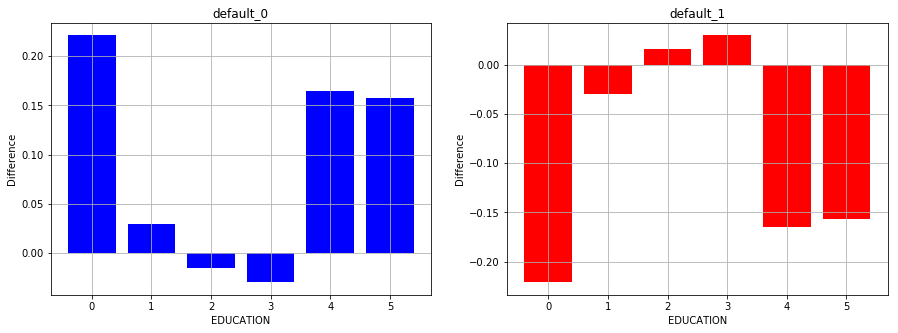

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.bar([0, 1, 2, 3, 4, 5], improved_dif_mat[:, 0], color = 'b')
plt.xlabel('EDUCATION')
plt.ylabel('Difference')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.bar([0, 1, 2, 3, 4, 5], improved_dif_mat[:, 1], color = 'r')
plt.xlabel('EDUCATION')
plt.ylabel('Difference')

plt.show()

По получившейся таблице improved_dif_mat видно, что наличие докторского образование (строка 0) является наилучшим индикатором того, что клиент вернет кредит.

Индикатор того, что клиент может не отдать кредит - выпускник школы (строка 3).

# Задание 4
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

В первую очередь уберем из столбца MARRIAGE таблиц клиентов, вернувших и не вернувших кредиты, все значения 0 и 3, которые означают, что данных нет, и переделаем получившиеся данные так, чтобы 0 и 1 соответствовали: 0 - холост, 1 - замужем/женат

In [33]:
default_0_marriage = df_default_0[df_default_0['MARRIAGE'] != 0]
default_0_marriage = default_0_marriage[default_0_marriage['MARRIAGE'] != 3]
default_0_marriage[default_0_marriage['MARRIAGE'] == 2] = 0
default_0_marriage = default_0_marriage['MARRIAGE'].values
default_1_marriage = df_default_1[df_default_1['MARRIAGE'] != 0]
default_1_marriage = default_1_marriage[default_1_marriage['MARRIAGE'] != 3]
default_1_marriage[default_1_marriage['MARRIAGE'] == 2] = 0
default_1_marriage = default_1_marriage['MARRIAGE'].values

Построим гистограммы семейного положения клиентов (MARRIAGE), вернувших кредит (default = 0) и клиентов, невернувших кредит (default = 1). По гистограмам можно предположить, что в группе людей, не вернувших кредит, доля женатых/замужних больше, чем в группе людей, вернувших кредит.

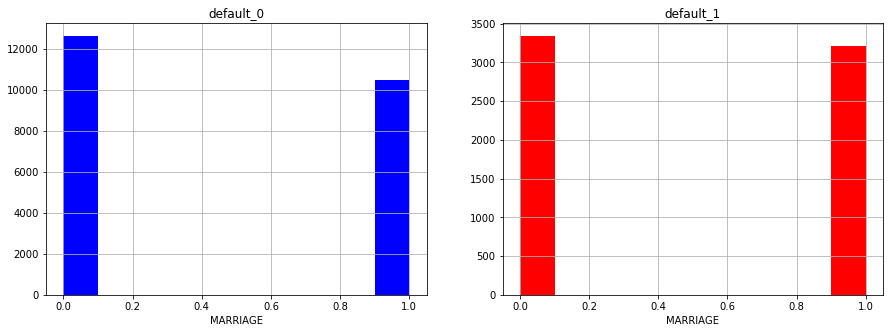

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.hist(default_0_marriage, color = 'b')
plt.xlabel('MARRIAGE')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.hist(default_1_marriage, color = 'r')
plt.xlabel('MARRIAGE')

plt.show()

Вычислим доли женатых/замужних в получившихся выборках

In [35]:
print 'Доля женатых/замужних в выборке клиентов, отдавших кредит:',  float(default_0_marriage.sum()) / len(default_0_marriage)
print 'Доля женатых/замужних в выборке клиентов, не отдавших кредит:',  float(default_1_marriage.sum()) / len(default_1_marriage)

Доля женатых/замужних в выборке клиентов, отдавших кредит: 0.452981452591
Доля женатых/замужних в выборке клиентов, не отдавших кредит: 0.489689934321


Проверяется гипотеза о том, что семейное положение не влияет на то, вернет ли человек долг.

То есть проверятся нулевая гипотеза $H_{0}$: семейное положение не влияет на вероятность возврата долга (распределения групп образования (EDUCATION) в группах людей, вернувших долг (default = 0) в группах людей, вернувших долг (default = 1) одинаковы) против альтернативы $H_{1}$: семейное положение влияет на вероятность возврата долга (распределения групп образования (EDUCATION) в группах людей, вернувших долг (default = 0) в группах людей, вернувших долг (default = 1) разлличные)

Составим таблицу сопряженности для данных выборок, в которой значение столбца 0 означает клиентов, выплативших кредит, 1 - клиентов, не выплативших кредит, значения строк 0, 1 соответствуют холостым и женатым/замужним клиентам, соответственно.

In [36]:
mat_corr = np.zeros((2, 2))
for i in range(2):
    mat_corr[i, 0] = len(default_0_marriage[default_0_marriage == i])
    mat_corr[i, 1] = len(default_1_marriage[default_1_marriage == i])
corr_table = pd.DataFrame(np.int32(mat_corr))
corr_table

,0,1
0,12623,3341
1,10453,3206


Вычислим коэффициент V Крамера через критерий хи-квадрат для корреляционной матрицы mat_corr.

In [37]:
print 'Коэффициент V Крамера для связи семейного положения и индикатора дефолта: ', coef_v_kram(mat_corr)

Коэффициент V Крамера для связи семейного положения и индикатора дефолта:  0.03055536992044591


Коэффициент V Крамера отличается от нуля, что свидетельствует о том, что есть взаимосвязь между семейным положением в группе людей, вернувших кредит и не вернувших. Проверить, что коэффициент V Крамера значимо отличается от нуля и можно отвергнуть нулевую теорию $H_{0}$ возможно с помощью критерия $χ^{2}$.

In [38]:
print 'p-value: ', sp.stats.chi2_contingency(mat_corr, correction=False)[1]

p-value:  1.4485143429812136e-07


p-value значительно меньше 0.05. Это означает, что семейное положение и принадлежность к группе людей, отдавших или неотдавших кредит, зависимы, следовательно, нулевая гипотеза $H_{0}$ отвергается.

Для оценки зависимости индекатора дефолта и семейного положения посчитаем корреляцию Мэтьюса. Для этого вычислим значения таблицы ячеек таблицы сопряженности и реализуем метод подсчета в функции mathews_corr

# Задание 5
Возраст (AGE): Относительно двух групп людей  вернувших и не вернувших кредит  проверьте следующие гипотезы:

a) о равенстве медианных значений возрастов людей;

b) о равенстве распределений  с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Значимы ли полученные результаты с практической точки зрения?

Сравнение гистограмм возраста клиентов, вернувших кредит (default = 0) и клиентов, не вернувших кредит (default = 1).

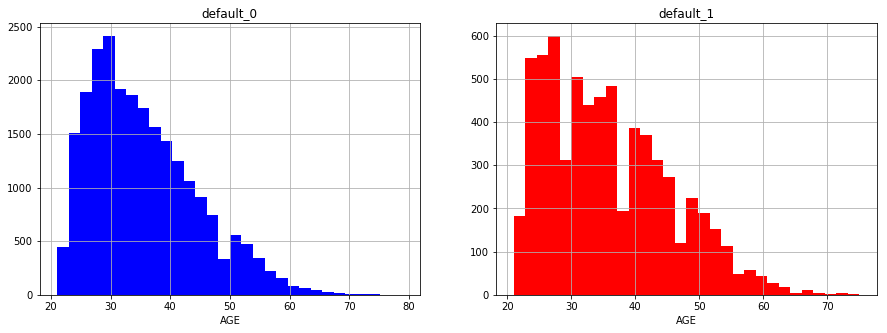

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.grid()
plt.title('default_0')
plt.hist(df_default_0['AGE'], color = 'b', bins=30)
plt.xlabel('AGE')

plt.subplot(1,2,2)
plt.grid()
plt.title('default_1')
plt.hist(df_default_1['AGE'], color = 'r', bins=30)
plt.xlabel('AGE')

plt.show()

a) Проверим гипотезу о равенстве медианных значений возраста в разных группах с помощью интервальной оценки.

То есть проверяется нулевая гипотеза $H_{0}:$ медианные значения возраста (AGE) в группе клиентов, вернувших кредит, (default_0) и в группе клиентов, не вернувших кредит (default_1) равны, против двухсторонней альтернативы $H_{1}$: медианные значения кредитного лимита (AGE) в этих группах не равны.

Оценим доверительные интервалы для медиан возрастов клиентов из данных выборок тем же способом, что и в Задании 1.

In [40]:
default_0_median_scores = map(np.median, get_bootstrap_samples(df_default_0['AGE'].values, 1000))
print '95%% доверительный интервал для медианы возраста клиентов, отдавших кредит:',  stat_intervals(default_0_median_scores, 0.05)

95%% доверительный интервал для медианы возраста клиентов, отдавших кредит: [34. 34.]


In [41]:
default_1_median_scores = map(np.median, get_bootstrap_samples(df_default_1['AGE'].values, 1000))
print '95%% доверительный интервал для медианы возраста клиентов, не отдавших кредит:',  stat_intervals(default_1_median_scores, 0.05)

95%% доверительный интервал для медианы возраста клиентов, не отдавших кредит: [34. 35.]


Доверительные интервалы для данных групп практически совпадают, следовательно, нулевая гипотеза $H_{0}$ не отвергается.

b) Далее проверяется гипотеза о равенстве распределений. Нулевую гипотезу $H_{0}$ и двухстороннюю альтернативу $H_{0}$ можно записать следующим образом:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$ (распределения одинаковы)

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$ (распределения неодинаковы, отличаются на сдвиг),

где $F_{X_1}(x)$ - распределение возраста (AGE) в группе клиентов, вернувших кредит, (default_0), $F_{X_2}(x)$ - распределение возраста (AGE) в группе клиентов, вернувших кредит, (default_1) 

Так как выборки независимые, то будем проверять гипотезу критерием Манна-Уитни.

In [42]:
print 'p-value: ', stats.mannwhitneyu(df_default_0['AGE'], df_default_1['AGE'])[1]

p-value:  0.1862517717449308


Достигаемый уровень значимости больше 0.05. Следовательно, нулевая гипотеза $H_{0}$ не отвергается.

Для проверки практической значимости проведем точечную оценку разности медиан данных выборок.

In [43]:
print 'Разница медиан возрастов составляет: ', df_default_0['AGE'].median() - df_default_1['AGE'].median()

Разница медиан возрастов составляет:  0.0


На основе данных вычислений можно сделать вывод о равенстве медиан возрастов в обеих группах и о отсутсвии зависимости вероятности возврата кредита и возраста.